# Titanic Survival Prediction

## Approach

**Data preparation**

- Handling missing values
- Handling categorical features

**Train & Tune Model**

- Train model
- Test accuracy
- Tune model parameters

**Make Prediction**
- Update test data set
- Sanity Check

## Part 1: Load Data & Handling Missing Values

In [499]:
# read the Titanic training data
import numpy as np
import pandas as pd
path = '../data/'
url = path + 'train.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.shape

(891, 11)

scikit-learn models expect that all values are **numeric** and **hold meaning**. Thus, missing values are not allowed by scikit-learn.

In [500]:
# check for missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [501]:
# fill missing values for Age with the median age
titanic.Age.fillna(titanic.Age.median(), inplace=True)

# get average, std, and number of NaN values in titanic_df
average_age_titanic   = titanic["Age"].mean()
std_age_titanic       = titanic["Age"].std()
count_nan_age_titanic = titanic["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)

# fill NaN values in Age column with random values generated
titanic["Age"][np.isnan(titanic["Age"])] = rand_1

# convert from float to int
titanic['Age'] = titanic['Age'].astype(int)

C:\Users\xwhx\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [502]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [503]:
# fill missing values for Embarked with the mode
titanic.Embarked.fillna('S', inplace=True)

In [504]:
# read the Titanic test data
import pandas as pd
path = '../data/'
url = path + 'test.csv'
titanic_test = pd.read_csv(url)
titanic_test.shape

(418, 11)

In [505]:
# check for missing values
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [506]:
titanic_test.Age.fillna(titanic_test.Age.median(), inplace=True)

# get average, std, and number of NaN values in test_df
average_age_test   = titanic_test["Age"].mean()
std_age_test       = titanic_test["Age"].std()
count_nan_age_test = titanic_test["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# fill NaN values in Age column with random values generated
titanic_test["Age"][np.isnan(titanic_test["Age"])] = rand_2

# convert from float to int
titanic_test['Age'] = titanic_test['Age'].astype(int)

titanic_test.Fare.fillna(titanic_test.Fare.median(), inplace=True)

C:\Users\xwhx\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Part 2: Handling categorical features

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

In [507]:
# Create and encode Female feature - Replaced this below with a more granular definition
#titanic['Female'] = titanic.Sex.map({'male':0, 'female':1})
#titanic_test['Female'] = titanic_test.Sex.map({'male':0, 'female':1})

In [508]:
# create a DataFrame of dummy variables for Embarked
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
titanic = pd.concat([titanic, embarked_dummies], axis=1)

In [509]:
# create a DataFrame of dummy variables for Embarked
embarked_dummies = pd.get_dummies(titanic_test.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
titanic_test = pd.concat([titanic_test, embarked_dummies], axis=1)

In [510]:
# create a DataFrame of dummy variables for Embarked
pclass_dummies = pd.get_dummies(titanic.Pclass, prefix='Pclass')
pclass_dummies.drop(pclass_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
titanic = pd.concat([titanic, pclass_dummies], axis=1)

In [511]:
# create a DataFrame of dummy variables for Embarked
pclass_dummies = pd.get_dummies(titanic_test.Pclass, prefix='Pclass')
pclass_dummies.drop(pclass_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
titanic_test = pd.concat([titanic_test, pclass_dummies], axis=1)


In [512]:
# Combine Sibling and Parent Columns
titanic['Family'] =  titanic["Parch"] + titanic["SibSp"]
titanic['Family'].loc[titanic['Family'] > 0] = 1
titanic['Family'].loc[titanic['Family'] == 0] = 0

# This apporach did not improve the accuracy score
#titanic['FamilySize'] =  titanic["Parch"] + titanic["SibSp"]
#titanic.loc[titanic.FamilySize==1,'FamilyLabel'] = 'Single'
#titanic.loc[titanic.FamilySize==2,'FamilyLabel'] = 'Couple'
#titanic.loc[(titanic.FamilySize>2)&(titanic.FamilySize<=4),'FamilyLabel'] = 'Small'
#titanic.loc[titanic.FamilySize>4,'FamilyLabel'] = 'Big'

titanic_test['Family'] =  titanic_test["Parch"] + titanic_test["SibSp"]
titanic_test['Family'].loc[titanic_test['Family'] > 0] = 1
titanic_test['Family'].loc[titanic_test['Family'] == 0] = 0

#titanic_test['FamilySize'] =  titanic_test["Parch"] + titanic_test["SibSp"]
#titanic_test.loc[titanic_test.FamilySize==1,'FamilyLabel'] = 'Single'
#titanic_test.loc[titanic_test.FamilySize==2,'FamilyLabel'] = 'Couple'
#titanic_test.loc[(titanic_test.FamilySize>2)&(titanic_test.FamilySize<=4),'FamilyLabel'] = 'Small'
#titanic_test.loc[titanic_test.FamilySize>4,'FamilyLabel'] = 'Big'




In [513]:
# create a DataFrame of dummy variables for FamilyLabel
#familylabel_dummies = pd.get_dummies(titanic.FamilyLabel, prefix='FamilyLabel')
#familylabel_dummies.drop(familylabel_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
#titanic = pd.concat([titanic, familylabel_dummies], axis=1)

In [514]:
# create a DataFrame of dummy variables for FamilyLabel
#familylabel_dummies = pd.get_dummies(titanic_test.FamilyLabel, prefix='FamilyLabel')
#familylabel_dummies.drop(familylabel_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
#titanic_test = pd.concat([titanic_test, familylabel_dummies], axis=1)

In [515]:
# Children have a high rate of survival regardless of sex, so treat them as separate
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic['Person'] = titanic[['Age','Sex']].apply(get_person,axis=1)
titanic_test['Person']    = titanic_test[['Age','Sex']].apply(get_person,axis=1)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(titanic['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(titanic_test['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic = pd.concat([titanic, person_dummies_titanic], axis=1)
titanic_test = pd.concat([titanic_test, person_dummies_test], axis=1)

In [516]:
titanic.drop("Cabin",axis=1,inplace=True)
titanic.drop("Name",axis=1,inplace=True)
titanic.drop("Sex",axis=1,inplace=True)
titanic.drop("Ticket",axis=1,inplace=True)
titanic.drop("Embarked",axis=1,inplace=True)
titanic.drop("Pclass",axis=1,inplace=True)
titanic.drop("Parch",axis=1,inplace=True)
titanic.drop("SibSp",axis=1,inplace=True)
#titanic.drop("FamilySize",axis=1,inplace=True)
#titanic.drop("FamilyLabel",axis=1,inplace=True)
titanic.drop("Person",axis=1,inplace=True)


titanic_test.drop("Cabin",axis=1,inplace=True)
titanic_test.drop("Name",axis=1,inplace=True)
titanic_test.drop("Sex",axis=1,inplace=True)
titanic_test.drop("Ticket",axis=1,inplace=True)
titanic_test.drop("Embarked",axis=1,inplace=True)
titanic_test.drop("Pclass",axis=1,inplace=True)
titanic_test.drop("Parch",axis=1,inplace=True)
titanic_test.drop("SibSp",axis=1,inplace=True)
#titanic_test.drop("FamilySize",axis=1,inplace=True)
#titanic_test.drop("FamilyLabel",axis=1,inplace=True)
titanic_test.drop("Person",axis=1,inplace=True)

In [517]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Survived      891 non-null int64
Age           891 non-null int32
Fare          891 non-null float64
Embarked_Q    891 non-null float64
Embarked_S    891 non-null float64
Pclass_2      891 non-null float64
Pclass_3      891 non-null float64
Family        891 non-null int64
Child         891 non-null float64
Female        891 non-null float64
dtypes: float64(7), int32(1), int64(2)
memory usage: 73.1 KB


In [518]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Age            418 non-null int32
Fare           418 non-null float64
Embarked_Q     418 non-null float64
Embarked_S     418 non-null float64
Pclass_2       418 non-null float64
Pclass_3       418 non-null float64
Family         418 non-null int64
Child          418 non-null float64
Female         418 non-null float64
dtypes: float64(7), int32(1), int64(2)
memory usage: 31.1 KB


# Part 3: Train and Tune the Model

In [519]:

# define training and testing sets

X_train = titanic.drop("Survived",axis=1)
y_train = titanic["Survived"]
X_test  = titanic_test.drop("PassengerId",axis=1).copy()

# import KNN class we need from scikit-learnQ
from sklearn.neighbors import KNeighborsClassifier

# instantiate the estimator 
knn = KNeighborsClassifier(n_neighbors=2, weights='distance') # Tune these parameters!

# run a knn.fit on the data to build the model
knn.fit(X_train, y_train)

titanic['y_pred_class_knn']=knn.predict(X_train)

# Test the accuracy
print knn.score(X_train, y_train)

0.978675645342


In [520]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
%matplotlib inline
import matplotlib.pyplot as plt

#random_forest = RandomForestClassifier()

#random_forest.fit(X_train, y_train)

#random_forest.score(X_train, y_train)

## Tuning the n_estimators parameter

In [521]:
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestClassifier(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X_train, y_train, cv=5, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

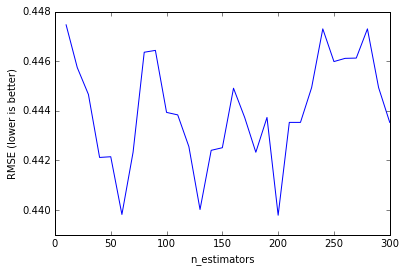

In [522]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

## Tuning the max_features parameter

In [523]:
# list of values to try for max_features
feature_range = range(1, len(X_train.columns)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestClassifier(n_estimators=200, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X_train, y_train, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

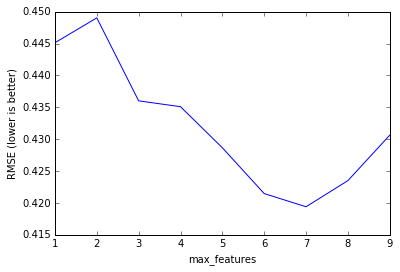

In [524]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE (lower is better)')

In [525]:
# show the best RMSE and the corresponding max_features
sorted(zip(RMSE_scores, feature_range))[0]

(0.4194099529166313, 7)

In [526]:
# max_features=7 is best and n_estimators=200 is sufficiently large
rfreg = RandomForestClassifier(n_estimators=200, max_features=7, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [527]:
# compute feature importances
pd.DataFrame({'feature':X_train.columns, 'importance':rfreg.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
1,Fare,0.299427
8,Female,0.260099
0,Age,0.253436
5,Pclass_3,0.085224
7,Child,0.030154
3,Embarked_S,0.022410
6,Family,0.020381
4,Pclass_2,0.017696
2,Embarked_Q,0.011172


In [528]:
# compute the out-of-bag R-squared score
rfreg.oob_score_

0.82379349046015715

## Reducing X to its most important features

In [494]:
# set a threshold for which features to include
print rfreg.transform(X_train, threshold=0.1).shape
print rfreg.transform(X_train, threshold='mean').shape
print rfreg.transform(X_train, threshold='median').shape

from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rfreg,threshold=0.1, prefit=True)
print(sfm.transform(X_train).shape[0],sfm.transform(X_train).shape[1])

sfm = SelectFromModel(rfreg, threshold='mean', prefit=True)
print(sfm.transform(X_train).shape[0],sfm.transform(X_train).shape[1])

sfm = SelectFromModel(rfreg, threshold='median', prefit=True)
print(sfm.transform(X_train).shape[0],sfm.transform(X_train).shape[1])

# create a new feature matrix that only includes important features
#X_important = rfreg.transform(X, threshold='mean')
#X_important.shape
sfm = SelectFromModel(rfreg, threshold='mean', prefit=True)
X_important = sfm.transform(X_train)
print(X_important.shape[0],X_important.shape[1])



C:\Users\xwhx\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\xwhx\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\xwhx\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(891L, 3L)
(891L, 3L)
(891L, 5L)
(891L, 3L)
(891L, 3L)
(891L, 5L)
(891L, 3L)


In [497]:
# check the RMSE for a Random Forest that only includes important features
rfreg = RandomForestClassifier(n_estimators=200, max_features=3, random_state=1)
scores = cross_val_score(rfreg, X_important, y_train, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.46487960874366491

# Part 4: Make Predictions

## Update Test Dataset & Create Submission File

In [529]:
# make predictions for testing set
titanic_test['Survived'] = rfreg.predict(X_test)


path = '../data/'
url = path + 'submit_randomforest_v4.csv'
titanic_test.index = titanic_test.PassengerId
titanic_test.to_csv(columns = ['Survived'], path_or_buf = url, header=True)

## Sanity Check ##

In [530]:
print titanic.Survived.value_counts() / titanic.Survived.count()
print titanic_test.Survived.value_counts() / titanic_test.Survived.count()

0    0.616162
1    0.383838
Name: Survived, dtype: float64
0    0.631579
1    0.368421
Name: Survived, dtype: float64


In [531]:
titanic_test.shape

(418, 11)

In [536]:
path = '../data/'
my_file = 'submit_randomforest_v4.csv'
comp_file = 'submit_randomforest_v2.csv' # Downloaded this file from Kaggle as a comparison.

url = path + my_file
my_df = pd.read_csv(url, index_col='PassengerId')

url = path + comp_file
comp_df = pd.read_csv(url, index_col='PassengerId')

joined_df = pd.concat([my_df, comp_df], axis=1)

In [537]:
joined_df.columns=['Mine', 'Compare']
joined_df.head()

,Mine,Compare
PassengerId,,
892,0,0
893,0,0
894,0,0
895,1,1
896,0,1


In [538]:
joined_df[joined_df.Mine != joined_df.Compare].count()

Mine       26
Compare    26
dtype: int64

In [539]:
joined_df[joined_df.Mine != joined_df.Compare]

,Mine,Compare
PassengerId,,
896,0,1
910,1,0
911,0,1
913,1,0
915,0,1
924,1,0
927,0,1
979,1,0
990,1,0
